<IPython.core.display.Javascript object>


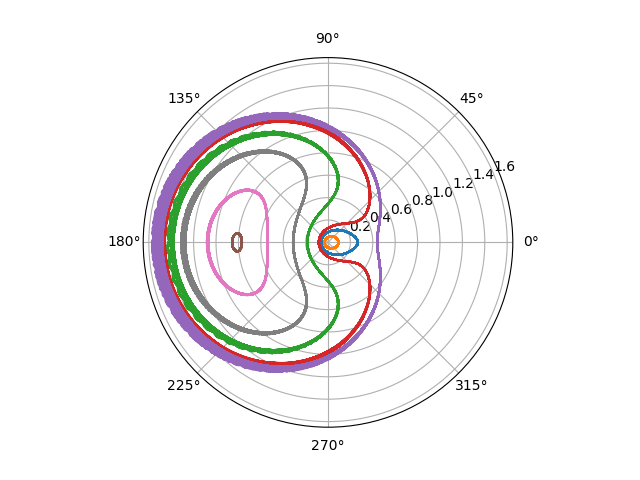

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from celmech.hamiltonian import AndoyerHamiltonian
from celmech.andoyer import Andoyer
import numpy as np

class Clicker(object):
    def __init__(self, k, Phiprime):
        self.ax = plt.subplot('111', projection='polar')
        self.k = k
        self.Phiprime = Phiprime
        self.cid = self.ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        phi = event.xdata
        Phi = event.ydata
        andvars = Andoyer(7, self.k,Phi,phi,Phiprime=self.Phiprime)
        H = AndoyerHamiltonian(andvars)
        tmax=100
        Nout = 1000
        times = np.linspace(0, tmax, Nout)
        Phi, phi = np.zeros(Nout), np.zeros(Nout)
        for i, time in enumerate(times):
            H.integrate(time)
            Phi[i] = H.state.Phi
            phi[i] = H.state.phi
        self.ax.plot(phi, Phi)
        #ax.set_rlim(0,20)

clicker = Clicker(2, 1.5)

In [3]:
andvars = Andoyer(7, 2,4,np.pi,Phiprime=1.5)
H = AndoyerHamiltonian(andvars)
tmax=100
Nout = 1000
times = np.linspace(0, tmax, Nout)
Phi, phi = np.zeros(Nout), np.zeros(Nout)
for i, time in enumerate(times):
    H.integrate(time)
    Phi[i] = H.state.Phi
    phi[i] = H.state.phi

In [4]:
Phi

array([ 4.        ,  3.46230645,  3.78327481,  3.78421863,  3.46178372,
        3.99999659,  3.4628085 ,  3.782278  ,  3.7851609 ,  3.46121773,
        3.99994889,  3.46331495,  3.78121566,  3.78613634,  3.46060138,
        3.99991367,  3.46390532,  3.78016177,  3.78715884,  3.46000793,
        3.99989501,  3.46450157,  3.77910702,  3.78820581,  3.45943783,
        3.99986171,  3.46508365,  3.77801732,  3.78925734,  3.45884338,
        3.99983474,  3.46567422,  3.77690641,  3.79029659,  3.45819902,
        3.99975199,  3.46629212,  3.77573954,  3.79139737,  3.45756731,
        3.99968095,  3.46689956,  3.7745094 ,  3.79251613,  3.45686983,
        3.99959421,  3.46759392,  3.77327556,  3.79368742,  3.45618416,
        3.99949994,  3.46825685,  3.77191465,  3.79492832,  3.45546343,
        3.99942218,  3.46900641,  3.77057085,  3.79616484,  3.45469507,
        3.99930133,  3.46978041,  3.76915231,  3.79750337,  3.45396786,
        3.99918727,  3.47057032,  3.7677075 ,  3.79884838,  3.45

<IPython.core.display.Javascript object>


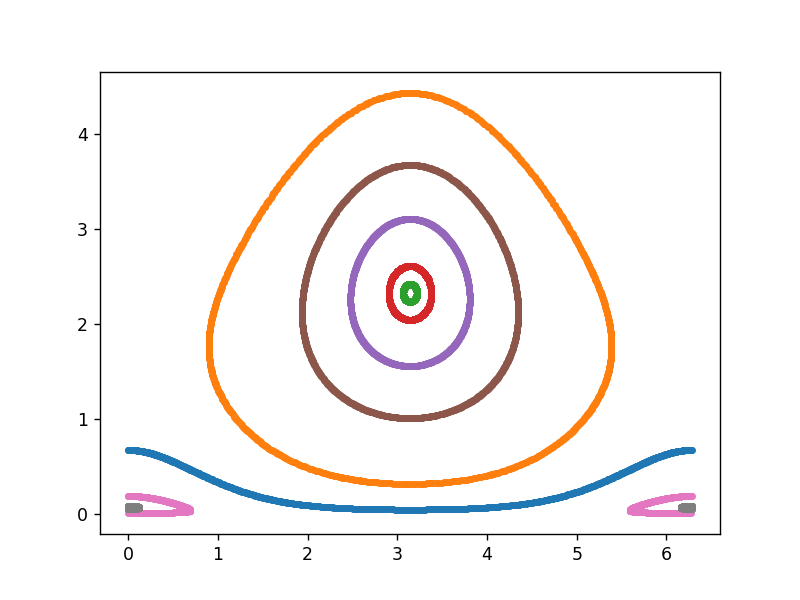

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from celmech.hamiltonian import AndoyerHamiltonian
import numpy as np

def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

class Clicker(object):
    def __init__(self, k, Phiprime):
        self.ax = plt.subplot('111')
        self.k = k
        self.Phiprime = Phiprime
        self.cid = self.ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        phi = event.xdata
        Phi = event.ydata
        if Phi < 0:
            return
        H = AndoyerHamiltonian(self.k,self.Phiprime,Phi,phi)
        tmax=100
        Nout = 1000
        times = np.linspace(0, tmax, Nout)
        sol = np.zeros((2, Nout))
        for i, time in enumerate(times):
            H.integrate(time)
            sol[:,i] = H.integrator.y
        self.ax.plot(npwrap(sol[1,:]), sol[0,:], '.')

clicker = Clicker(1, 2)